<a href="https://colab.research.google.com/github/dote7ant/Penalty-regressions/blob/master/Penalty_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis to find factors that affect housing prices and using these factors make a prediction of house prices.

####Introduction.

Working as a Data scientist for Hass Consulting Company, we have been tasked in finding out the factors that affect the overall price of a house. Using the above identified factors we will create a model to predict accurately the prices of a house.

1. Defining the question.




As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

2. Defining the metrics for succes.

3. Understanding the context.

4. Recording the experimental design

## 1. Reading data and Importing libraries.

In [103]:
# here we import all the necessary libraries we will need for the task
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

Loading the data set

In [ ]:
# we will use pandas for this 
url = "http://bit.ly/IndependentProjectWeek7Dataset"
df = pd.read_csv(url)
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

## 2. Checking the data.

In [ ]:
# checking the columns to determine whether we will rename any of them
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Below is the dataset glossary:

* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15




In [ ]:
# preview the first 5 
print("These are the first 5 rows:\n")
df.head()


These are the first 5 rows:



id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [ ]:
# preview the last 5 rows
print("These are the last 5 rows:\n")
df.tail()

These are the last 5 rows:



id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

From the previews we can see that all the columns are in the data type format for numbers. Next we check whether this observation is true.

In [ ]:
# check the data types for the columns
print("The data types in our data set for various columns is as shown below:\n")
df.info()
print("-----------------------------------------------------------------------")

The data types in our data set for various columns is as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 no

We can observe in the non -null count that there are 21613 non-null values this means that in each column there is an equal count of values.

In [ ]:
# check number of rows and columns in the data set
df.shape
print("There are", df.shape[0], "rows and", df.shape[1], "columns in our data set.")

There are 21613 rows and 20 columns in our data set.


We note that we have a total of 21613 rows and we had found that there are 21613 non-null counts for all our columns. This tells us that there are no columns with empty values or missing values. We confirm this observation.

In [ ]:
# check for missing values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We can clearly observe that there are no missing values.

In [ ]:
# check for duplicates
print("There are duplicate values in our data set:", df.duplicated().any())

There are duplicate values in our data set: True


There are duplicates in our data set.

In [ ]:
# show the values that are duplicates except the first occurence
df[df.duplicated()]

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
3951   1825069031  550000.0         4  ... -122.088           2520       14789
14983  6308000010  585000.0         3  ... -122.172           2290        7984
20054  8648900110  555000.0         3  ... -122.093           1880        3078

[3 rows x 20 columns]

The duplicates will be dropped later on.

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

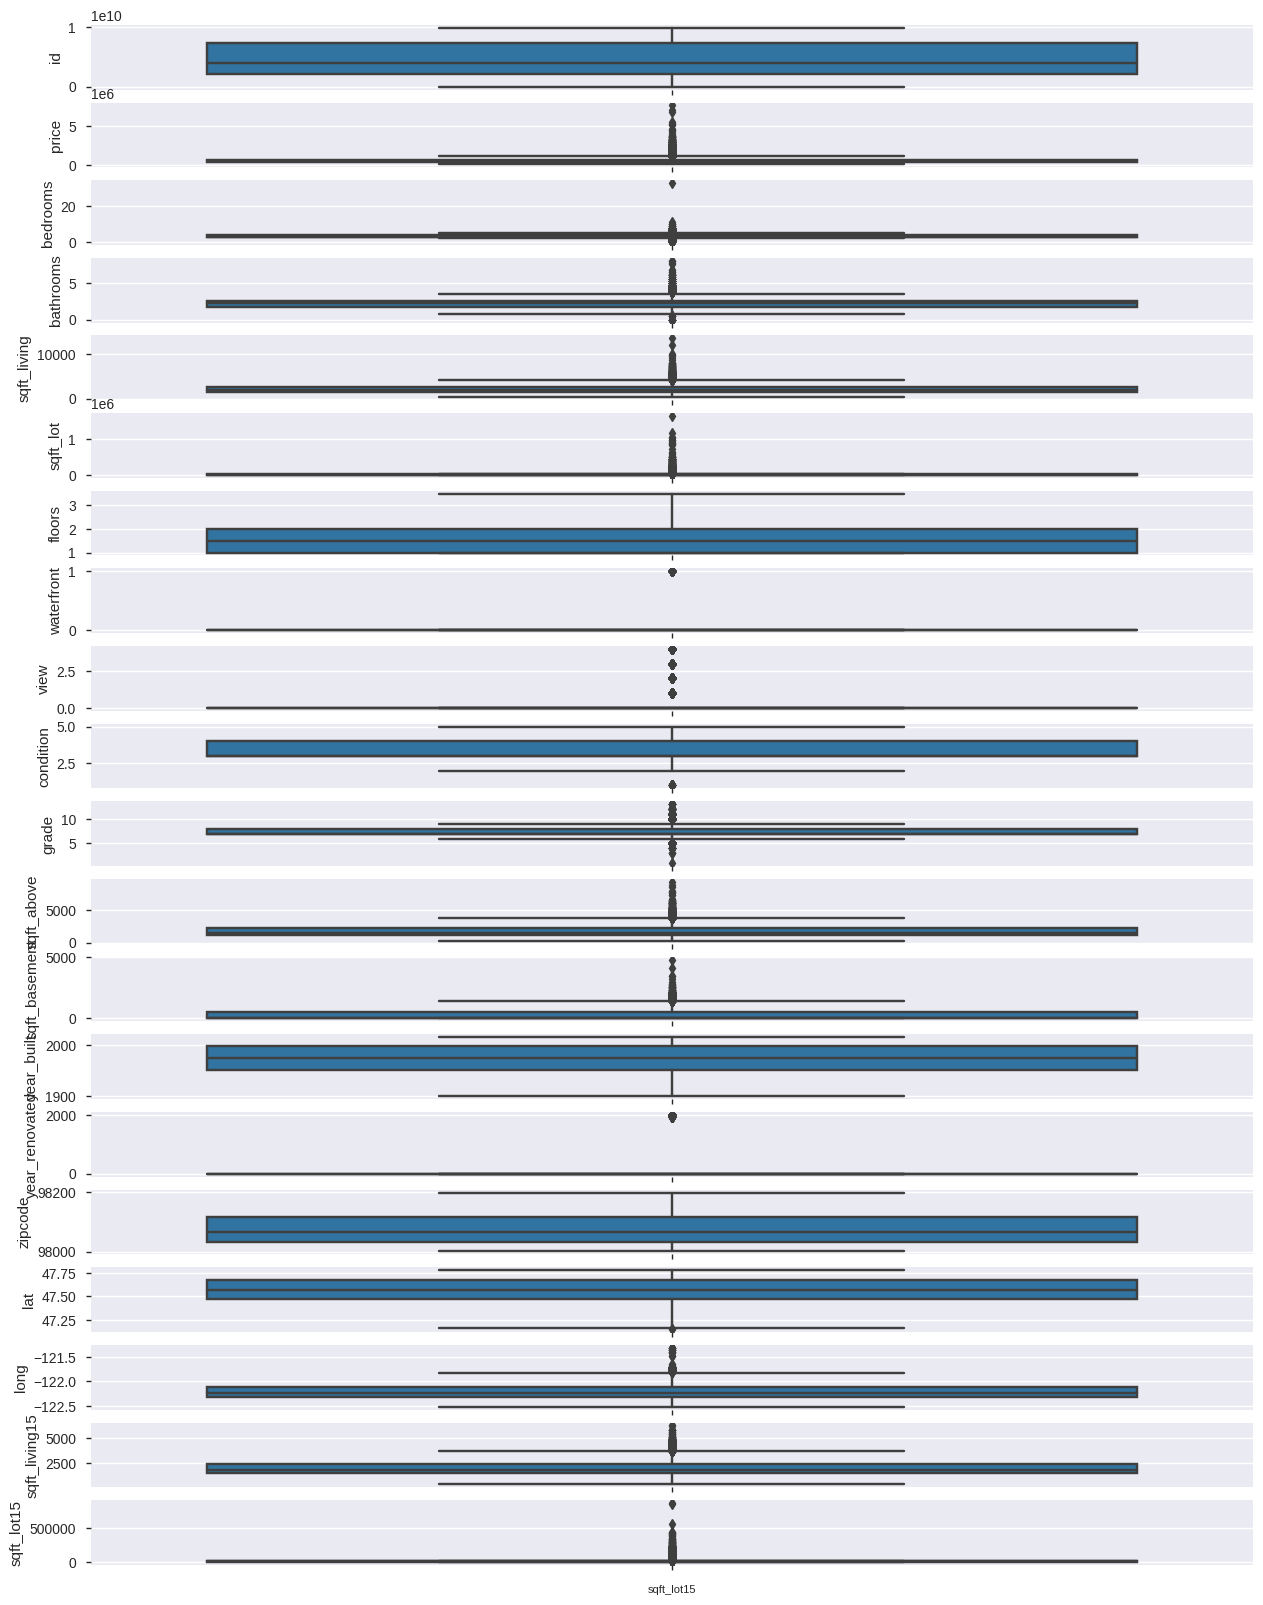

In [ ]:
# using boxplots find outliers
col_names= df.columns
fig, ax = plt.subplots(len(col_names), figsize=(15,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

For some reason our boxplots are not showing even after debugging so we go with another method of finding outliers.

In [ ]:
# we the quantile information to get outliers any figure that is less than this (Q1 - 1.5 * IQR)))  is a suspected outlier and any figure
# greater than this ( (Q3 + 1.5 * IQR)))  is a suspected outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
a = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
a
# note when we have False there is no suspected outlier and if the value is True we have an outlier.

id  price  bedrooms  ...   long  sqft_living15  sqft_lot15
0      False  False     False  ...  False          False       False
1      False  False     False  ...  False          False       False
2      False  False     False  ...  False          False       False
3      False  False     False  ...  False          False       False
4      False  False     False  ...  False          False       False
...      ...    ...       ...  ...    ...            ...         ...
21608  False  False     False  ...  False          False       False
21609  False  False     False  ...  False          False       False
21610  False  False     False  ...  False          False       False
21611  False  False     False  ...  False          False       False
21612  False  False     False  ...  False          False       False

[21613 rows x 20 columns]

In [ ]:
# first we check which columns have outliers
b = a.any() == True
print("These are the columns with outliers:\n",b)

# if the value is False then that column does not have outliers otherwise it does.

These are the columns with outliers:
 id               False
price             True
bedrooms          True
bathrooms         True
sqft_living       True
sqft_lot          True
floors           False
waterfront        True
view              True
condition         True
grade             True
sqft_above        True
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat               True
long              True
sqft_living15     True
sqft_lot15        True
dtype: bool


We can see that the following columns have outliers.
Price, bedrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_renovated, lat, long, sqft_living15, sqft_lot15. We conclude that we should not drop any of the outliers as the price could influence them we assume this.

## 3. Tidying up the data set.

In [ ]:
# drop our duplicates that we found
df.drop_duplicates(keep='first', inplace = True)
# confirm there are no more duplicates
print("The data has duplicates: ", df.duplicated().any())

The data has duplicates:  False


There are no more duplicates in our data set.

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# rename the column names
df.rename(columns = {'yr_built' : 'year_built', 'yr_renovated' : 'year_renovated'}, inplace = True)
# confirm rename was successful
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Successful renaming of our columns.

## 4. Exploratory Data Analysis (EDA).

In [ ]:
# make a copy of our data set to use for the EDA
df_clean = df.copy()


### Univariate Analysis

In [ ]:
a = df_clean.drop(columns = ['zipcode', 'lat', 'long', 'id'])
a.describe()

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.161000e+04  21610.000000  ...   21610.000000   21610.000000
mean   5.401789e+05      3.370847  ...    1986.518695   12769.031976
std    3.673876e+05      0.930110  ...     685.425781   27305.972464
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.216125e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.000000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000

[8 rows x 16 columns]

What can we see? We observe that the house with the most bedrooms is 33. Most bathrooms is 8. Most floors 3.5. Highest grade is 13. Most recent year built and renovated is 2015.

---
We also observe the means of bedrooms is 3.37, bathrooms is 2.1, floors 1.5. We plot distribution plots to observe this results.


In [141]:
# find the variance of the data
df_clean.var()

id                8.274523e+18
price             1.349736e+11
bedrooms          8.651041e-01
bathrooms         5.932137e-01
sqft_living       8.436428e+05
sqft_lot          1.715884e+09
floors            2.915930e-01
waterfront        7.486257e-03
view              5.869651e-01
condition         4.234936e-01
grade             1.381801e+00
sqft_above        6.858137e+05
sqft_basement     1.958918e+05
year_built        8.627519e+02
year_renovated    1.612017e+05
zipcode           2.862825e+03
lat               1.920218e-02
long              1.983388e-02
sqft_living15     4.698085e+05
sqft_lot15        7.456161e+08
dtype: float64

We observe that some columns have large variances.

#### Distributions

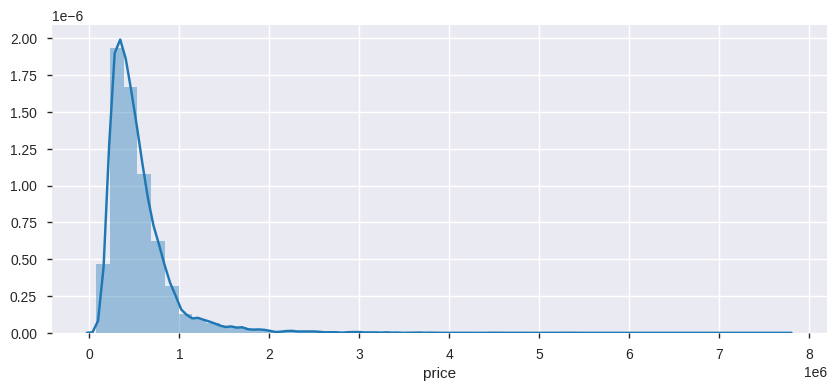

In [ ]:
# distribution plot for the price
plt.figure(figsize = (10, 4))
sns.distplot(df_clean["price"])

We observe that as the price grows from zero the number of houses in that price range increase to about 0.5 then the number of houses start to drop as the price increases.

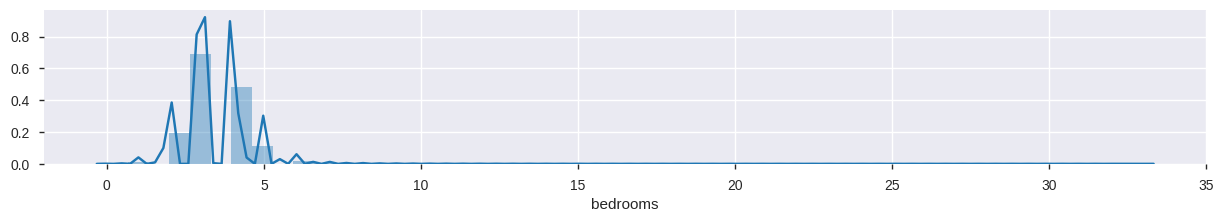

In [ ]:
# distribution plot for the number of bedrooms in a house
plt.figure(figsize = (15, 2))
sns.distplot(df_clean["bedrooms"])

We observe that majority of all the houses lie within the range of 2 to 5 bedrooms while there are a few that have more than 5 bedroooms and a few with just 1 bedroom.

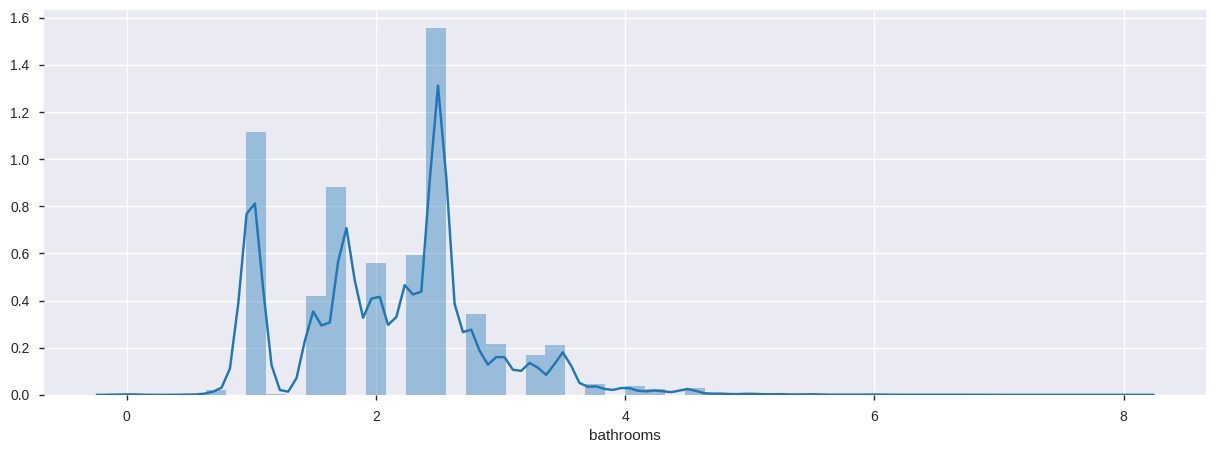

In [ ]:
# distribution plot for the number of bathrooms
plt.figure(figsize = (15, 5))
sns.distplot(df_clean["bathrooms"])

Most houses have 3 bathrooms and below and we can see that those that have more than 3 bathrooms are fewer as the bathrooms reach 4 the number of houses reduce even futher. We do also notice that there are some houses with just one bathroom.

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

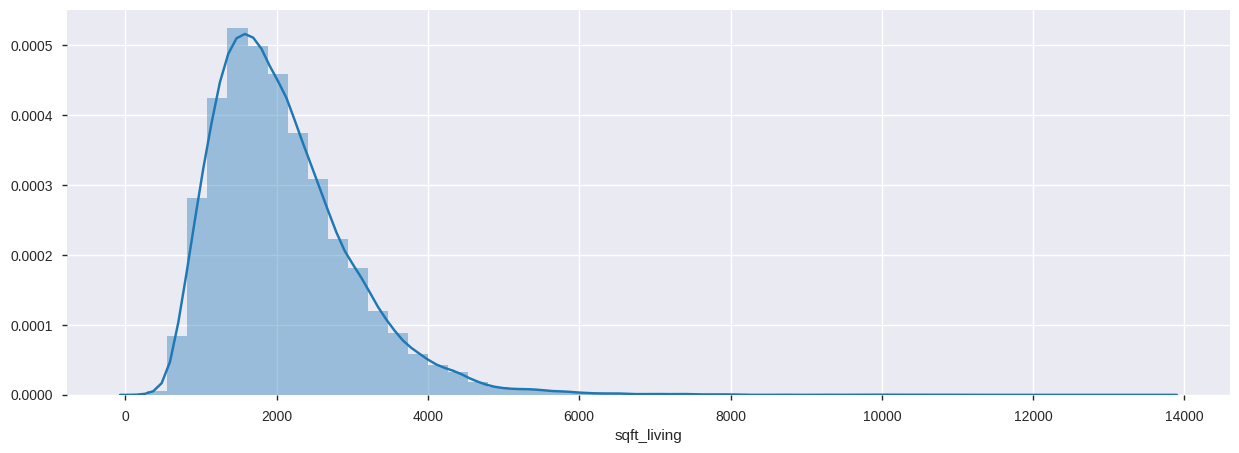

In [ ]:
# distribution plot for the number of bathrooms
plt.figure(figsize = (15, 5))
sns.distplot(df_clean["sqft_living"])


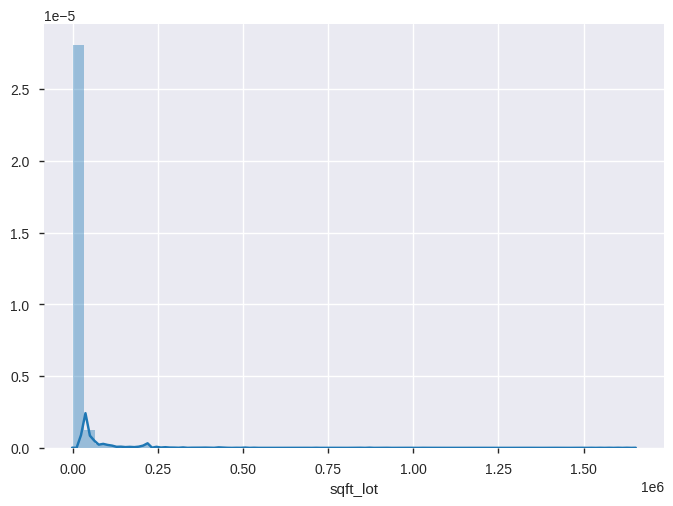

In [ ]:
sns.distplot(df_clean["sqft_lot"])


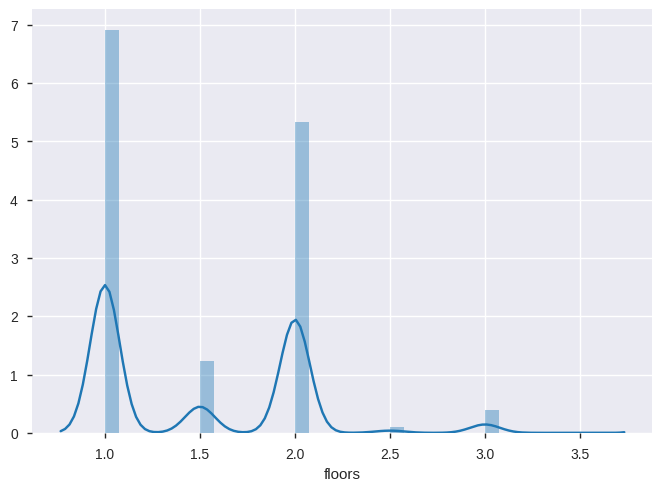

In [ ]:
sns.distplot(df_clean["floors"])

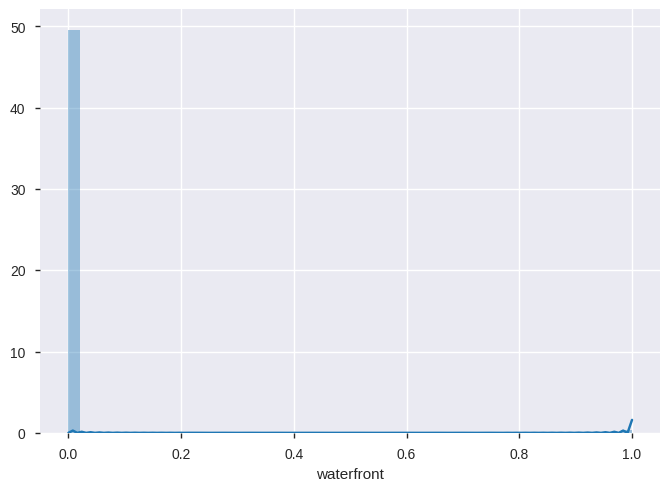

In [ ]:
sns.distplot(df_clean["waterfront"])


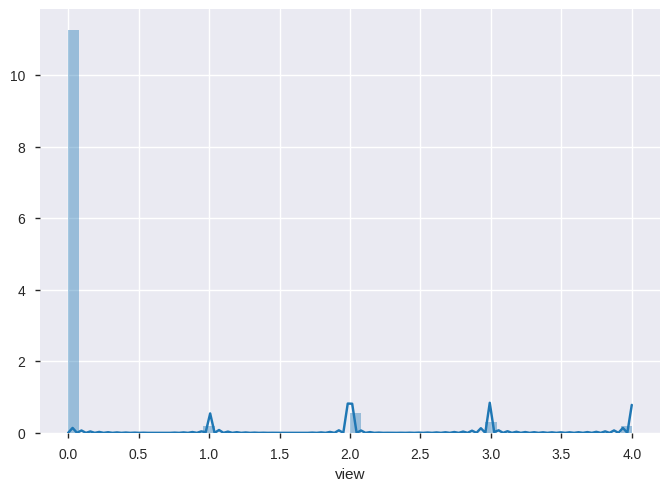

In [ ]:
sns.distplot(df_clean["view"])


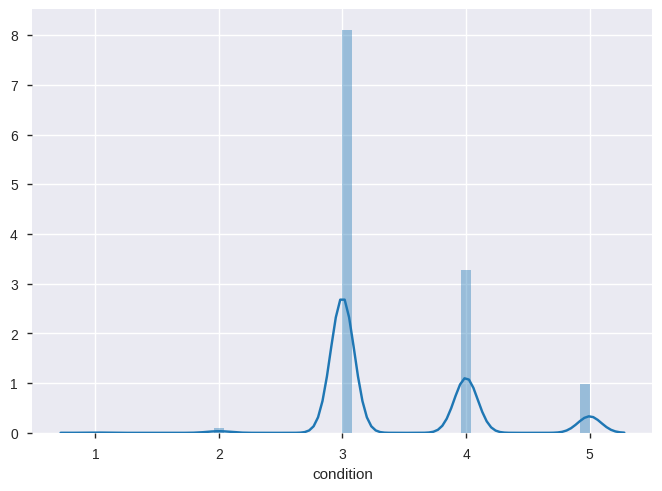

In [ ]:
sns.distplot(df_clean["condition"])


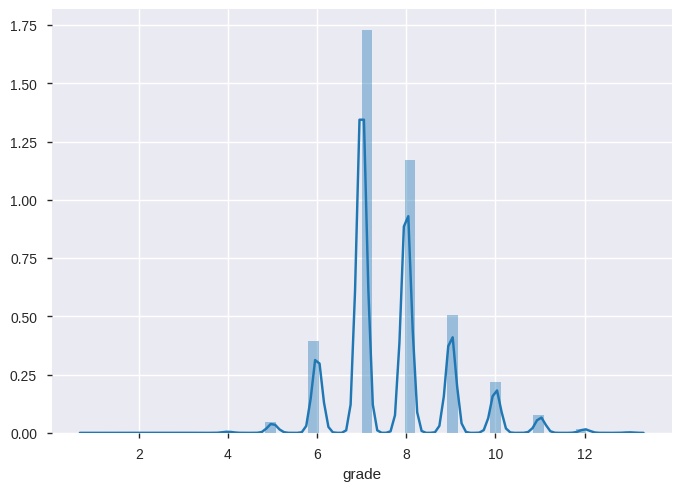

In [ ]:
sns.distplot(df_clean["grade"])


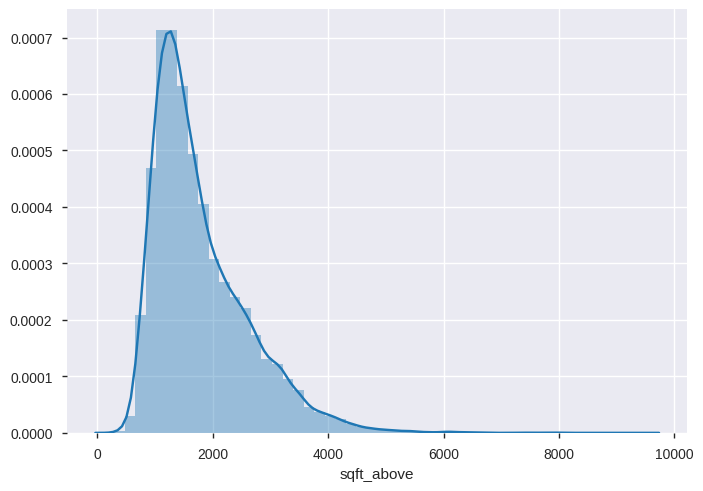

In [ ]:
sns.distplot(df_clean["sqft_above"])


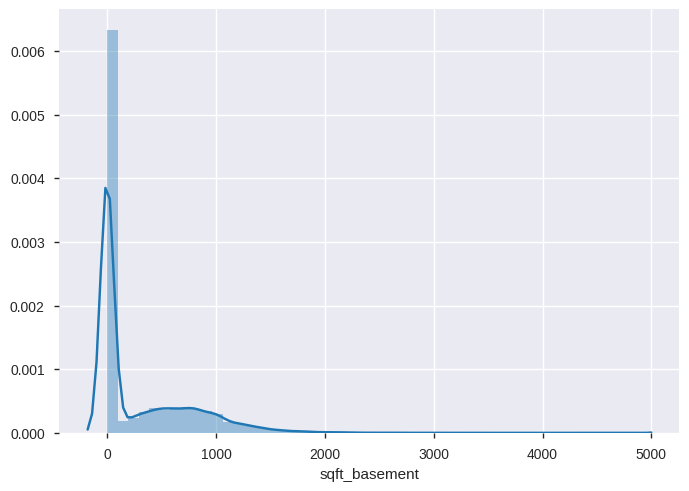

In [ ]:
sns.distplot(df_clean["sqft_basement"])


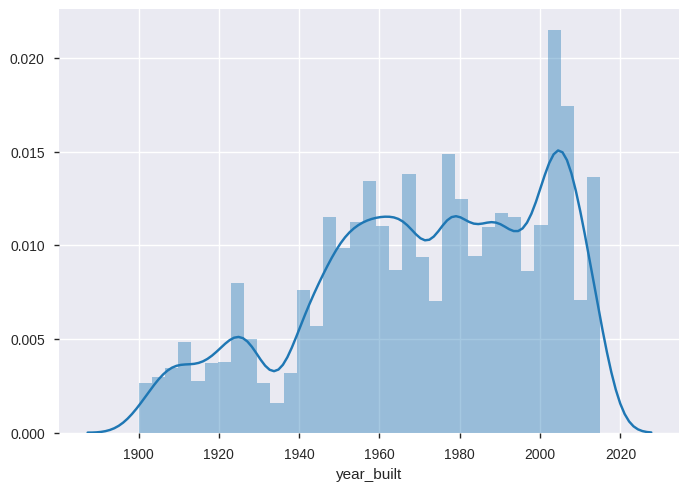

In [ ]:
sns.distplot(df_clean["year_built"])


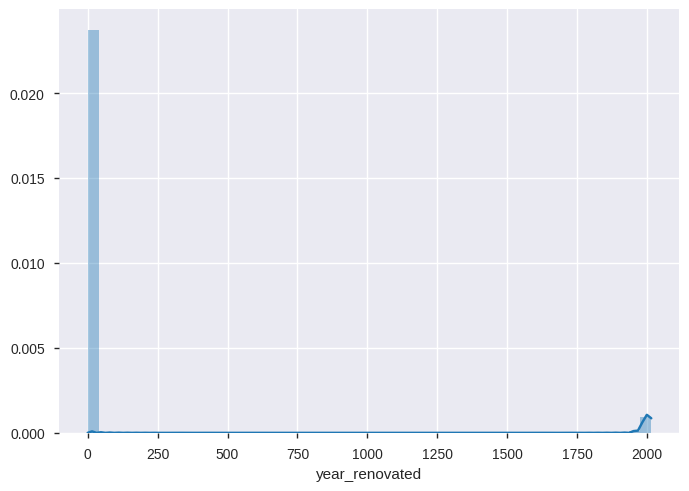

In [ ]:
sns.distplot(df_clean["year_renovated"])


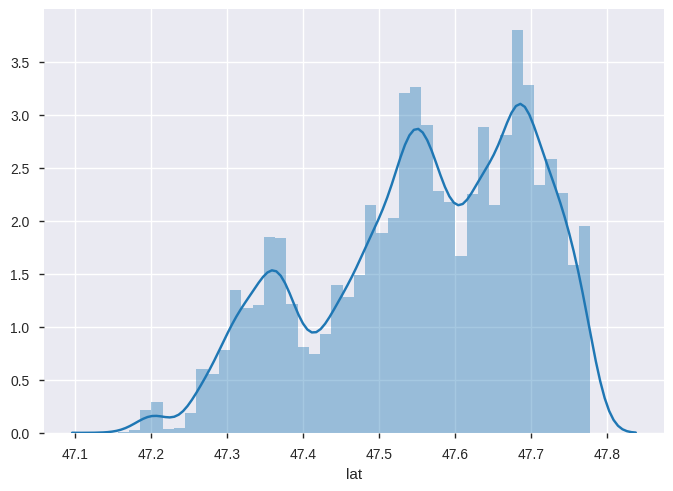

In [ ]:
sns.distplot(df_clean["lat"])


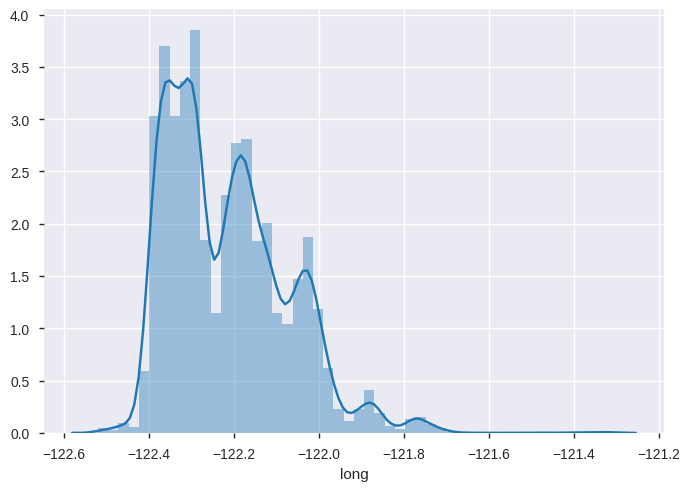

In [ ]:
sns.distplot(df_clean["long"])

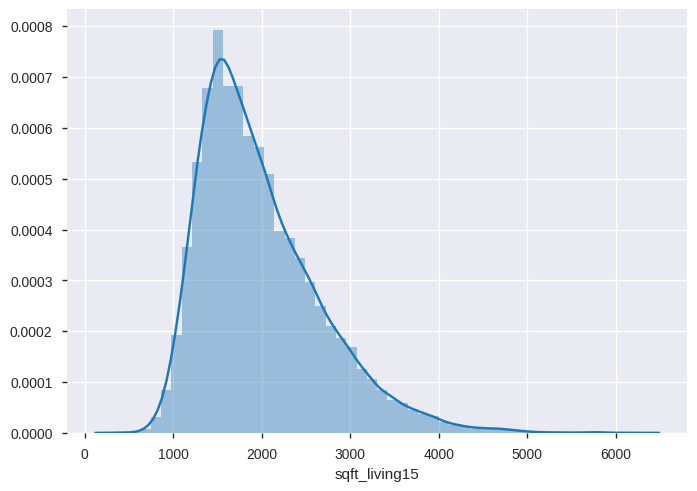

In [ ]:
sns.distplot(df_clean["sqft_living15"])

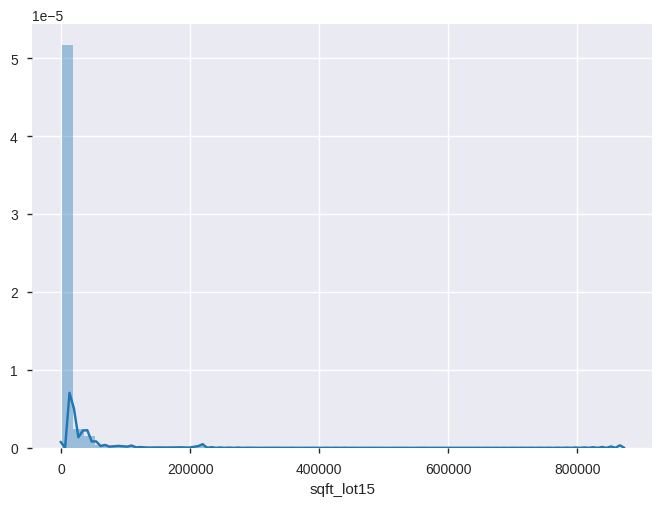

In [ ]:
sns.distplot(df_clean["sqft_lot15"])

In [ ]:
x1 = df_clean['price']
x2 = df_clean['bedrooms']
x3 = df_clean['bathrooms']
x4 = df_clean['sqft_living']
x5 = df_clean['sqft_lot']
x6 = df_clean['floors']
x7 = df_clean['waterfront']
x8 = df_clean['view']
x9 = df_clean['condition']
x10 = df_clean['grade']
x11 = df_clean['sqft_above']
x12 = df_clean['sqft_basement']
x13 = df_clean['year_built']
x14 = df_clean['year_renovated']
#x15 = df_clean['zipcode']
x16 = df_clean['lat']
x17 = df_clean['long']
x18 = df_clean['sqft_living15']
x19 = df_clean['sqft_lot15']

# plot
fig, axes = plt.subplots(3, 6, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1)
sns.distplot(x2)
sns.distplot(x3)
sns.distplot(x4)
sns.distplot(x5)
sns.distplot(x6)
sns.distplot(x7)
sns.distplot(x8)
sns.distplot(x9)
sns.distplot(x10)
sns.distplot(x11)
sns.distplot(x12)
sns.distplot(x13)
sns.distplot(x14)
#sns.distplot(x15 , color="gold", ax=axes[2], axlabel='Good')
sns.distplot(x16)
sns.distplot(x17)
sns.distplot(x18)
sns.distplot(x19)
plt.xlim(50,75);

### Bivariate Analysis

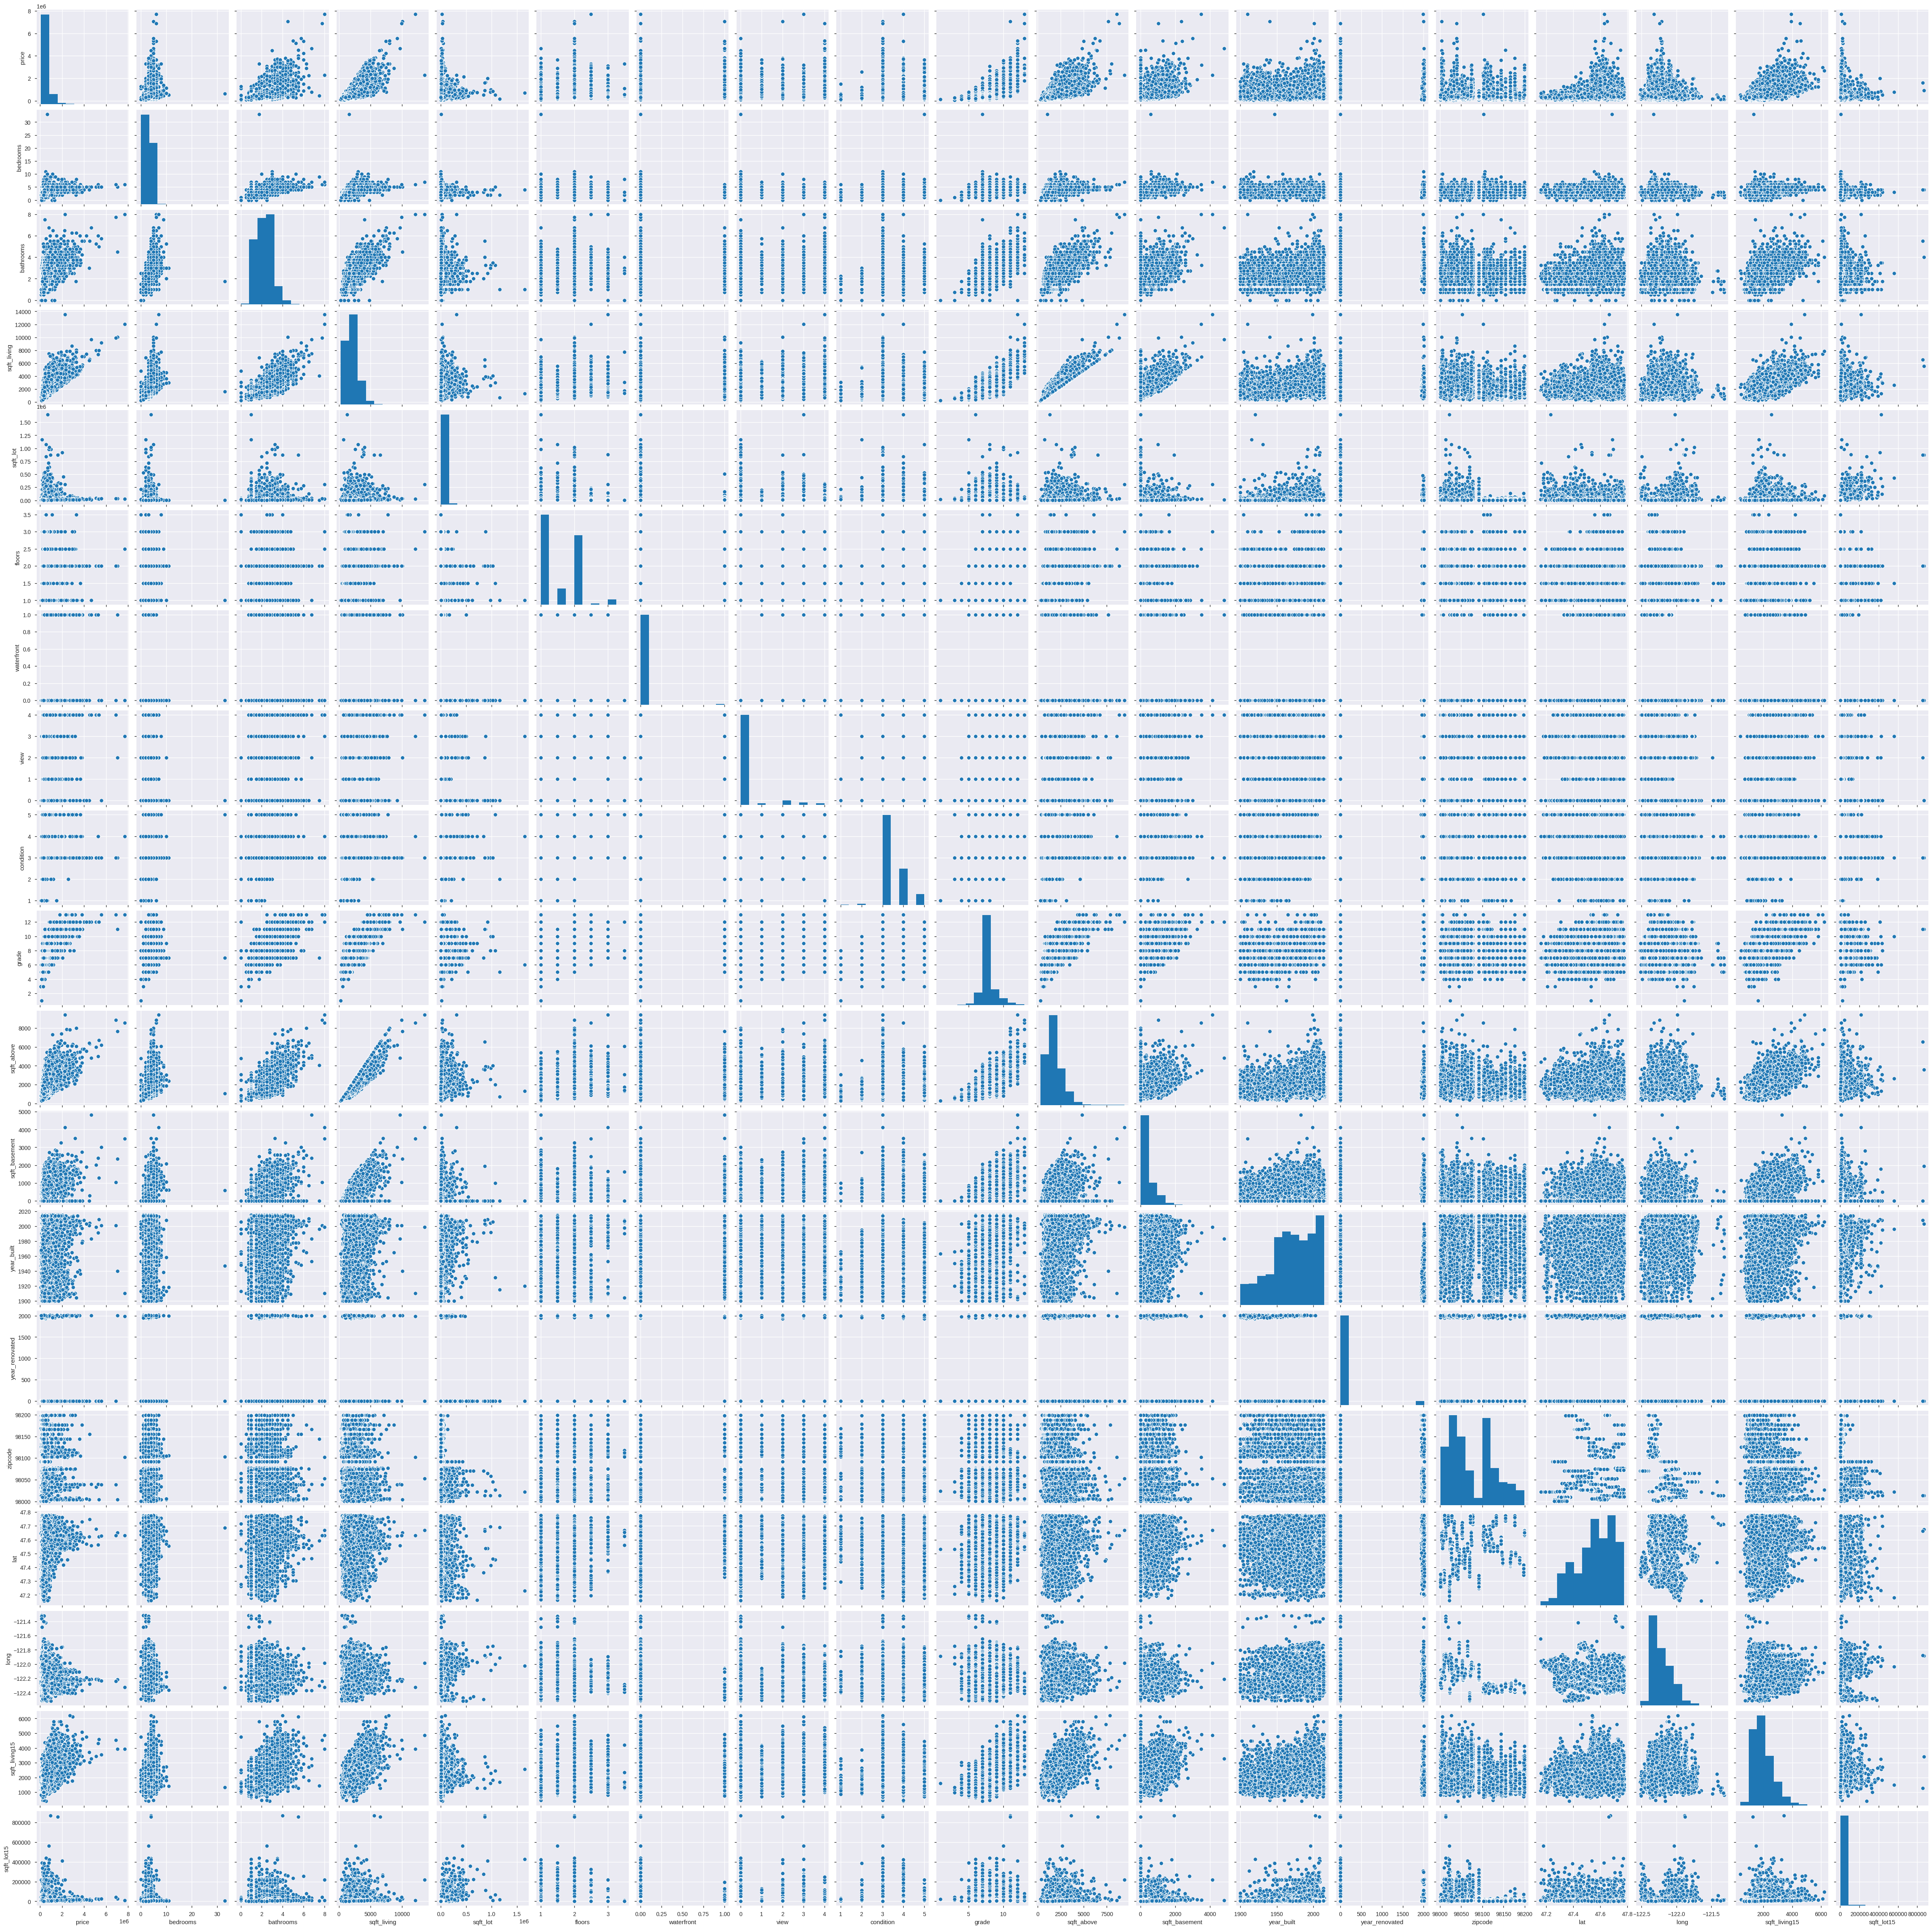

In [100]:
sns.pairplot(df_clean.drop(columns = ['id']))
plt.show()

In [ ]:
corr = df_clean.corr()
corr

id     price  ...  sqft_living15  sqft_lot15
id              1.000000 -0.016803  ...      -0.002869   -0.138778
price          -0.016803  1.000000  ...       0.585382    0.082457
bedrooms        0.001354  0.308346  ...       0.391633    0.029233
bathrooms       0.005093  0.525140  ...       0.568665    0.087191
sqft_living    -0.012239  0.702046  ...       0.756420    0.183285
sqft_lot       -0.132101  0.089658  ...       0.144620    0.718556
floors          0.018482  0.256793  ...       0.279861   -0.011250
waterfront     -0.002717  0.266332  ...       0.086469    0.030702
view            0.011785  0.397466  ...       0.280404    0.072577
condition      -0.023686  0.036397  ...      -0.092854   -0.003424
grade           0.008093  0.667478  ...       0.713208    0.119265
sqft_above     -0.010857  0.605569  ...       0.731870    0.194060
sqft_basement  -0.005084  0.323849  ...       0.200367    0.017260
year_built      0.021218  0.053980  ...       0.326298    0.070999
year_renovated -0.016688  0.126503  ...      -0.002841    0.007837
zipcode        -0.008129 -0.053162  ...      -0.279033   -0.147257
lat            -0.001861  0.306922  ...       0.048839   -0.086423
long            0.020776  0.021567  ...       0.334592    0.254475
sqft_living15  -0.002869  0.585382  ...       1.000000    0.183194
sqft_lot15     -0.138778  0.082457  ...       0.183194    1.000000

[20 rows x 20 columns]

In [ ]:
# Find the VIF matrix
print("Below is our VIF matrix\n")
pd.DataFrame(np.linalg.inv(df_clean.corr().values), index = corr.index, columns=corr.columns)

Below is our VIF matrix



id     price  ...  sqft_living15  sqft_lot15
id              1.028540  0.033969  ...       0.009146    0.105496
price           0.033969  3.332295  ...      -0.134514    0.098148
bedrooms        0.002152  0.301726  ...       0.013095    0.094209
bathrooms      -0.005156 -0.287101  ...       0.103587    0.062761
sqft_living    -0.010671 -0.785636  ...      -1.028101   -0.073623
sqft_lot        0.077239 -0.045576  ...       0.166567   -1.452753
floors         -0.011689 -0.033555  ...       0.273871    0.070515
waterfront      0.002847 -0.456966  ...       0.072920   -0.031177
view           -0.038108 -0.369703  ...      -0.310816   -0.021847
condition       0.021970 -0.155362  ...       0.082421   -0.030425
grade          -0.048362 -1.024667  ...      -0.870625    0.037830
sqft_above      0.028104 -0.652563  ...      -0.553437   -0.146129
sqft_basement  -0.001420 -0.224354  ...       0.048639   -0.041890
year_built      0.023671  0.699144  ...       0.049642   -0.011472
year_renovated  0.017587 -0.072360  ...       0.102374   -0.022464
zipcode         0.000245  0.282693  ...       0.198801   -0.007429
lat             0.007392 -0.757299  ...      -0.064068    0.015887
long           -0.072991  0.271815  ...      -0.366240   -0.160569
sqft_living15   0.009146 -0.134514  ...       2.985185   -0.128486
sqft_lot15      0.105496  0.098148  ...      -0.128486    2.149169

[20 rows x 20 columns]

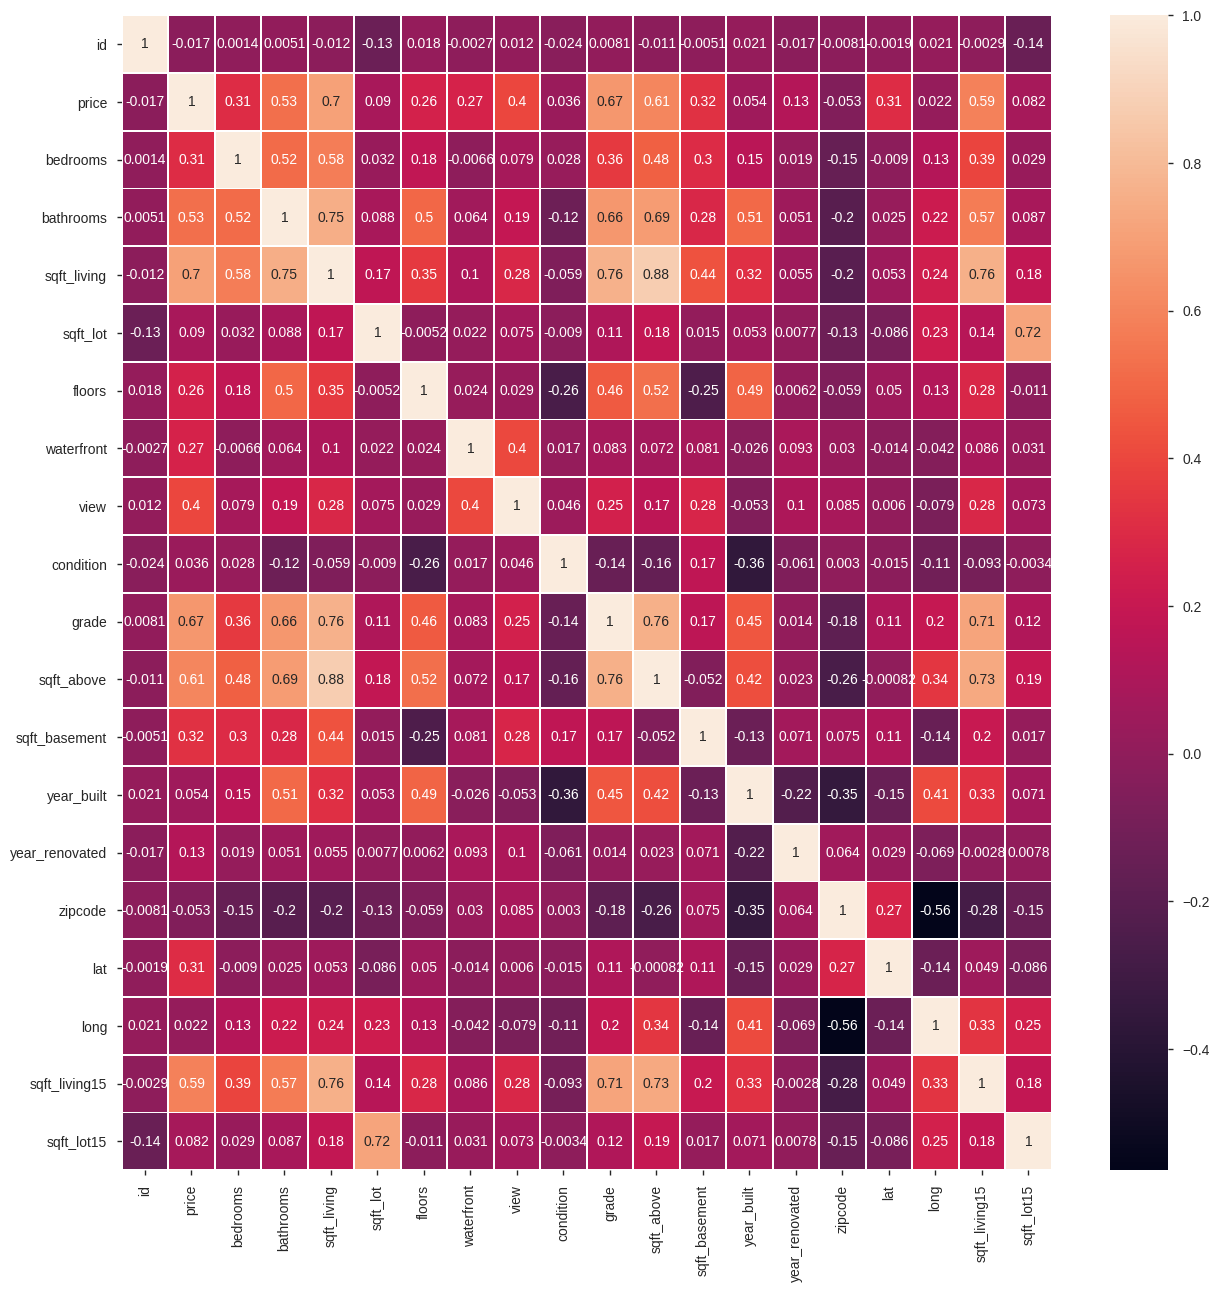

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(corr, annot=True,  linewidths=.5, ax=ax)

### Multivariate Analysis

We already know that we have outliers in our data so we cannot use Factor analysis. We are left with PCA and LDA. We can use LDA here and challenge our solution later on with PCA.

In [134]:
# get data for the independent and dependent variables
X = df_clean.drop(columns = ['id']).values
y = df_clean['price'].values

# function that takes in the independent and dependent variables together with the number of parametes we want to return.
def Factor(X, y, n, d):
 # divide data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 # standardize our data before perfoming LDA
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

 # perform LDA 
 # here we will use one parameter 
  lda = LDA(n_components=n)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)

 # we have now got one parameter to use now we test the perfomance
  classifier = RandomForestClassifier(max_depth=d, random_state=0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  #cm = confusion_matrix(y_test, y_pred)
  #print(cm)
  a = accuracy_score(y_test, y_pred)
  print('Accuracy: ' + str(a))

In [135]:
# we have 18 independent variables
# we start with n as 1
Factor(X, y, 1, 2)

Accuracy: 0.05599259602036094


Our accuracy with one parameter is 0.055.

In [136]:
# we start with n as 5
Factor(X, y, 5, 2)

Accuracy: 0.05599259602036094


In [137]:
# we start with n as 1
Factor(X, y, 15, 2)

Accuracy: 0.05599259602036094


We observe that no matter how many parameters we include the accuracy score does not change. The question is what would happen if we changed the depth.

What is the maximum depth? This is how we far push each node until all the leaves are pure. If we do not set this the nodes are expanded until all the leaves are pure or until all leaves contain less than min_samples_split samples.

In [138]:
# we start the maximum depth at 5 and one parameter
Factor(X, y, 1, 5)

Accuracy: 0.2070800555298473


We notice the accuracy has considerably improved dispite the factor we only have one parameter.

In [139]:
# maximum depth at 10 and parameters are 5
Factor(X, y, 5, 10)

Accuracy: 0.5432670060157334


The accuracy has improved yet again by adding the number of parameters and depth.

In [140]:
# maximum depth at 15 and parameters at 10
Factor(X, y, 10, 15)

Accuracy: 0.7623785284590467


The accuracy has improved yet again. The question now is how far can we push LDA to a point where the accuracy does not improve any more?

## 5. Solution Implementation.

### Quantile Regression

As noted in the univariate analysis the variance is huge. Linear models have a key assumption that the error has a constant variance across the independent variables which we know is now proved wrong.

In [148]:
Quant.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# make new copy for quantile regression
Quant = df_clean.copy()

# get the independent and dependent variables
x = Quant[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15']].values
y = Quant['price'].values

mod = smf.quantreg('y ~ x', Quant)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())


In [172]:
# get the independent and dependent variables
X = Quant[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'year_built',
           'year_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = Quant['price']

# prepare the quantile that we want to work with
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# loop to change the columns
for i in np.arange(0,17,1):
  
  x = X.iloc[:,i]
  mod = smf.quantreg('y ~ x', df)
  # loop to calculate the quantile data
  for qt in quantiles:
    #mod = smf.quantreg('y ~ x', df)
    res = mod.fit(q = qt)
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)


      qt      intercept        x_coef  cf_lower_bound  cf_upper_bound
0    0.1  119799.999998  40050.000001    37230.100748    42869.899253
1    0.2  134999.999998  50000.000001    47090.337138    52909.662864
2    0.3  149750.000006  61049.999999    57639.130857    64460.869140
3    0.4  165000.000001  72500.000000    68716.436956    76283.563044
4    0.5  179999.999994  85000.000002    81011.031417    88988.968587
..   ...            ...           ...             ...             ...
148  0.5  440825.602843      0.870936        0.733319        1.008553
149  0.6  504306.952099      0.979891        0.816693        1.143089
150  0.7  567787.562906      1.331949        1.169391        1.494507
151  0.8  664736.035626      1.853605        1.661589        2.045621
152  0.9  736697.264082      5.714143        5.549026        5.879260

[153 rows x 5 columns]


In [173]:
print(params.head(50))
print(params.tail(50))

     qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0   0.1  119799.999998   40050.000001    37230.100748    42869.899253
1   0.2  134999.999998   50000.000001    47090.337138    52909.662864
2   0.3  149750.000006   61049.999999    57639.130857    64460.869140
3   0.4  165000.000001   72500.000000    68716.436956    76283.563044
4   0.5  179999.999994   85000.000002    81011.031417    88988.968587
5   0.6  188333.333332  101666.666667    96935.830917   106397.502417
6   0.7  189574.999994  122712.500003   117858.065984   127566.934021
7   0.8  191000.000003  151999.999999   145541.134223   158458.865774
8   0.9  150000.000001  215000.000000   203156.804610   226843.195389
9   0.1   86000.000000   87000.000000    84737.068391    89262.931609
10  0.2   97499.999999  105000.000001   102204.576117   107795.423885
11  0.3   99666.666639  129333.333360   125837.105581   132829.561139
12  0.4  101666.666652  153333.333338   149376.359170   157290.307506
13  0.5  114000.0000

### Ridge Regression

### Lasso Regression

### Elastic Net Regression

## 6. Challenging the solution.